<style>
    .body={
        line-height: normal;
    }
</style>
<!--img src="https://res-console.cloudinary.com/ddwbemdym/thumbnails/v1/image/upload/v1709459897/a3Zta3BsaHV4dnNrYmwwbHZtNHE=/template_primary/Yl9yZ2I6RkZGRkZGL2NfY3JvcCx3XzE5MCxoXzIwMA==" width="100"-->
![](onGame.PNG)
<h3>A-Z STATISTICAL ANALYSIS</h3>
<p>PROJECT RESOURCES <a href="https://github.com/gitioannis">https://github.com/gitioannis</a></p>

**Understanding the business**  
> **OnGame** is a subscription-based devision of **Toys4Us** for online gaming packages to young professional gamers. The Head of Marketing Department for the devison would like you to:
1. Review the data and perform any necessary data wrangling
2. Perform Customer Exploratory Analysis to get a better understanding of the customer base.
3. Predict trends of growth for Yearly Amount Spend and Gender pattern recognision
4. Provide sound feedback on the analysis to the Head of Marketing Department 

# Data Understanding  
Start by loading and previewing the file structure.  
>**CustomerID:** Identifier for the customer  
**AverageSessionHrs:** Average hours spent in a session by the customer  
**TimeOnAppHrs:** Hours spent on the app by the customer  
**TimeOnWebsiteHrs:** Hours spent on the website by the customer  
**LengthOfMembershipYrs:** Length of membership in years  
**YearlyAmountSpent:** Yearly amount spent by the customer  
**Sex:** Gender of the customer  
**Age:** Age of the customer  

In [1]:
import pandas as pd

# Load the uploaded file
file_path = 'OnGameCustomerDS.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
df.head()


,CustomerID,AverageSessionHrs,TimeOnAppHrs,TimeOnWebsiteHrs,LengthOfMembershipYrs,YearlyAmountSpent,Sex,Age
0,1,32.021595,11.366348,36.683776,4.685017,521.572175,Female,30.0
1,2,32.739143,12.351959,37.373359,4.434273,549.904146,Female,26.0
2,3,33.987773,13.386235,37.534497,3.273434,570.200409,Female,18.0
3,4,NaN,11.814128,37.145168,3.202806,427.199385,Male,29.0
4,5,33.992573,13.338975,37.225806,2.482608,492.606013,Male,22.0


In [3]:
df.tail()

,CustomerID,AverageSessionHrs,TimeOnAppHrs,TimeOnWebsiteHrs,LengthOfMembershipYrs,YearlyAmountSpent,Sex,Age
16,17,33.616038,11.936386,38.768641,3.649286,521.883573,Female,28.0
17,18,31.721652,11.755024,36.765722,1.847370,347.776927,Male,28.0
18,19,NaN,11.984418,37.044361,3.452389,490.738632,Male,28.0
19,20,32.749368,9.954976,37.388315,4.650491,478.170334,Male,31.0
20,21,32.567230,NaN,NaN,NaN,537.846195,NaN,NaN


In [31]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values

CustomerID               0
AverageSessionHrs        2
TimeOnAppHrs             3
TimeOnWebsiteHrs         1
LengthOfMembershipYrs    1
YearlyAmountSpent        0
Sex                      1
Age                      1
dtype: int64

**Data Communication**  
>Some values are missing from the dataset. In a real situation, the data analysis department would communicate again with the OnGame marketing to inform them of the missing values and agree on an action plan. The OnGame head of marketing has decided that:
>1. Customer with ID 21 has too many values missing and data cannot be recovered and has asked us to delete them from our dataset.  
>2. The missing values for the AverageSessionHrs will be replaced with the previous values in the column.  
>3. The three missing values in TimeOnAppHrs would be replaced with the average column values.

In [32]:
# Examining data types
data_types = df.dtypes
data_types

CustomerID                 int64
AverageSessionHrs        float64
TimeOnAppHrs             float64
TimeOnWebsiteHrs         float64
LengthOfMembershipYrs    float64
YearlyAmountSpent        float64
Sex                       object
Age                      float64
dtype: object

# Data Preparation

In [4]:
# Delete the last row of the data and show the last rows for verification
df.set_index("CustomerID")
df = df[df["CustomerID"]<21]
df.tail(5)

,CustomerID,AverageSessionHrs,TimeOnAppHrs,TimeOnWebsiteHrs,LengthOfMembershipYrs,YearlyAmountSpent,Sex,Age
15,16,32.820310,11.634893,35.368626,4.124585,507.441832,Male,29.0
16,17,33.616038,11.936386,38.768641,3.649286,521.883573,Female,28.0
17,18,31.721652,11.755024,36.765722,1.847370,347.776927,Male,28.0
18,19,NaN,11.984418,37.044361,3.452389,490.738632,Male,28.0
19,20,32.749368,9.954976,37.388315,4.650491,478.170334,Male,31.0


In [5]:
# Replace the average session hours with the previous value
df['AverageSessionHrs'].fillna(method='ffill', inplace=True)
df['AverageSessionHrs'].isnull().sum()

0

In [6]:
# Replacing missing values in 'TimeOnAppHrs', 'TimeOnWebsiteHrs', and 'LengthOfMembershipYrs' 
# with the mean of their respective columns

columns_to_fill = ['TimeOnAppHrs', 'TimeOnWebsiteHrs', 'LengthOfMembershipYrs']
for column in columns_to_fill:
    df[column].fillna(df[column].mean(), inplace=True)

# Check if all missing values have been addressed
df.isnull().sum()


CustomerID               0
AverageSessionHrs        0
TimeOnAppHrs             0
TimeOnWebsiteHrs         0
LengthOfMembershipYrs    0
YearlyAmountSpent        0
Sex                      0
Age                      0
dtype: int64

**Creating YearStarted as additional series**  
>A new column named YearStarted calculates the year each customer started using the service, based on their LengthOfMembershipYrs as of the current year (2024). The calculation assumes a simple subtraction of the length of membership from the current year, rounded down to the nearest whole number for the starting year.

In [7]:
from datetime import datetime

# Assuming the current year to calculate the YearStarted
current_year = datetime.now().year

# Calculating the YearStarted based on LengthOfMembershipYrs
df['YearStarted'] = current_year - df['LengthOfMembershipYrs'].astype(int)
df.head()


,CustomerID,AverageSessionHrs,TimeOnAppHrs,TimeOnWebsiteHrs,LengthOfMembershipYrs,YearlyAmountSpent,Sex,Age,YearStarted
0,1,32.021595,11.366348,36.683776,4.685017,521.572175,Female,30.0,2020
1,2,32.739143,12.351959,37.373359,4.434273,549.904146,Female,26.0,2020
2,3,33.987773,13.386235,37.534497,3.273434,570.200409,Female,18.0,2021
3,4,33.987773,11.814128,37.145168,3.202806,427.199385,Male,29.0,2021
4,5,33.992573,13.338975,37.225806,2.482608,492.606013,Male,22.0,2022


**Creating AppWebUtilisation as additional series**  
>A new field AppWebUtilisation has been added to the dataset as the percentage of total online time (app + website) that each user spends in the app. The calculation is based on the user's time spent on the app relative to the combined time spent on both the app and website.

In [9]:
df['AppWebUtilisation'] = (df['TimeOnAppHrs'] / (df['TimeOnAppHrs'] + df['TimeOnWebsiteHrs'])) * 100
df.head()

,CustomerID,AverageSessionHrs,TimeOnAppHrs,TimeOnWebsiteHrs,LengthOfMembershipYrs,YearlyAmountSpent,Sex,Age,YearStarted,AppWebUtilisation
0,1,32.021595,11.366348,36.683776,4.685017,521.572175,Female,30.0,2020,23.655190
1,2,32.739143,12.351959,37.373359,4.434273,549.904146,Female,26.0,2020,24.840382
2,3,33.987773,13.386235,37.534497,3.273434,570.200409,Female,18.0,2021,26.288379
3,4,33.987773,11.814128,37.145168,3.202806,427.199385,Male,29.0,2021,24.130511
4,5,33.992573,13.338975,37.225806,2.482608,492.606013,Male,22.0,2022,26.379972


In [10]:
# Round all applicable series to one digit decimal
columns_to_round = ['AverageSessionHrs', 'TimeOnAppHrs', 'TimeOnWebsiteHrs', 'LengthOfMembershipYrs', 
                    'YearlyAmountSpent', 'Age', 'AppWebUtilisation']

df[columns_to_round] = df[columns_to_round].round(1)
df.head()

,CustomerID,AverageSessionHrs,TimeOnAppHrs,TimeOnWebsiteHrs,LengthOfMembershipYrs,YearlyAmountSpent,Sex,Age,YearStarted,AppWebUtilisation
0,1,32.0,11.4,36.7,4.7,521.6,Female,30.0,2020,23.7
1,2,32.7,12.4,37.4,4.4,549.9,Female,26.0,2020,24.8
2,3,34.0,13.4,37.5,3.3,570.2,Female,18.0,2021,26.3
3,4,34.0,11.8,37.1,3.2,427.2,Male,29.0,2021,24.1
4,5,34.0,13.3,37.2,2.5,492.6,Male,22.0,2022,26.4


**Examin the data types are appropriate for analysis**  
> Age needs to be converted to an int since decimals do add any calculation value.

In [11]:
# Converting the 'Age' column to integers
df['Age'] = df['Age'].astype(int)
df.head()

,CustomerID,AverageSessionHrs,TimeOnAppHrs,TimeOnWebsiteHrs,LengthOfMembershipYrs,YearlyAmountSpent,Sex,Age,YearStarted,AppWebUtilisation
0,1,32.0,11.4,36.7,4.7,521.6,Female,30,2020,23.7
1,2,32.7,12.4,37.4,4.4,549.9,Female,26,2020,24.8
2,3,34.0,13.4,37.5,3.3,570.2,Female,18,2021,26.3
3,4,34.0,11.8,37.1,3.2,427.2,Male,29,2021,24.1
4,5,34.0,13.3,37.2,2.5,492.6,Male,22,2022,26.4


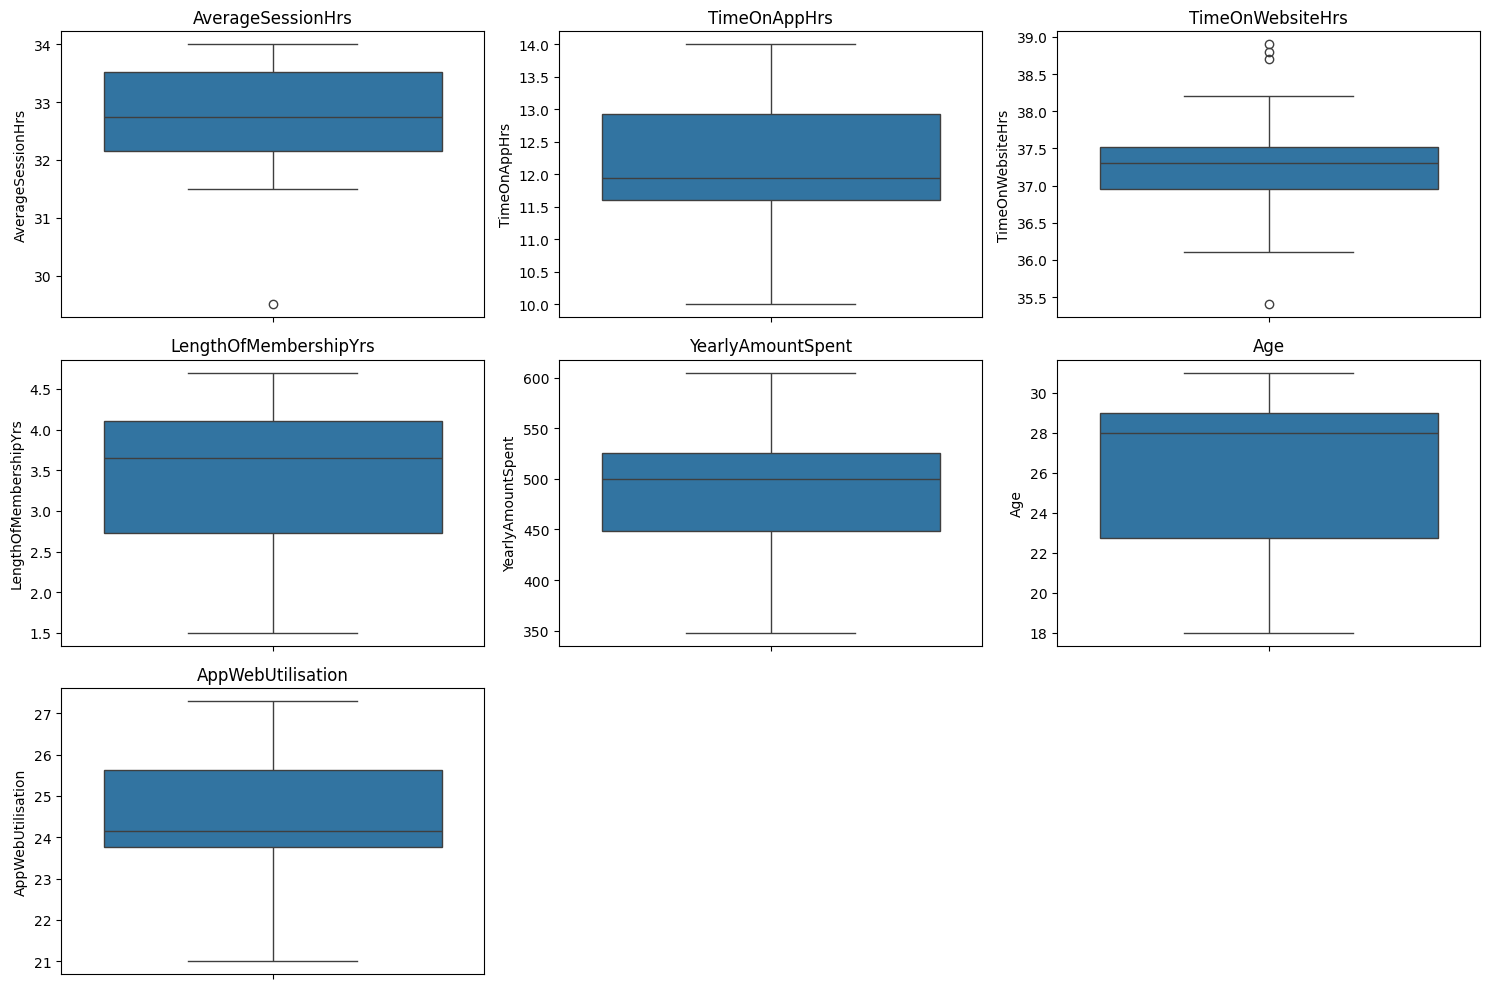

In [41]:
# Seaborn is an external library and needs to be installed
%pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting boxplots to identify outliers in numerical columns
numerical_columns = ['AverageSessionHrs', 'TimeOnAppHrs', 'TimeOnWebsiteHrs', 'LengthOfMembershipYrs', 
                     'YearlyAmountSpent', 'Age', 'AppWebUtilisation']

plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

**Data outliers check**  
The boxplots for the numerical columns in the dataset provide insights into the distribution of each column and the presence of outliers.  
>**AverageSessionHrs** - Distribution seems fairly normal without apparent outliers.  
**TimeOnAppHrs** - There's a relatively normal distribution, with potential outliers on the lower end.  
**TimeOnWebsiteHrs** - This column also shows a fairly normal distribution with no clear outliers.  
**LengthOfMembershipYrs** - Most of the data points are within a central range, but there are a few potential outliers on the higher end.  
**YearlyAmountSpent** - The distribution is fairly normal, with a few potential outliers on both the lower and higher ends.  
**Age** - The age distribution seems normal with a few potential outliers on the higher end.  
**AppWebUtilisation** - The distribution shows some potential outliers on both ends, indicating a few customers have a significantly different app-to-website usage ratio compared to the majority.

After discussing this with marketing, the decision was to consider all outliers valid and proceed with futher data analysis.

**Encoding**  
>Encode categorical variables like Sex to use them in the model-based analysis.

In [12]:
# Export file for further processing in other applications
# to create a new starting point
#df.to_csv("OnGameCustomerDFClean.csv")

In [4]:
# Load the new clean file
import pandas as pd
df = pd.read_csv("OnGameCustomerDFClean.csv")
df.head()

,CustomerID,AverageSessionHrs,TimeOnAppHrs,TimeOnWebsiteHrs,LengthOfMembershipYrs,YearlyAmountSpent,Sex,Age,YearStarted,AppWebUtilisation
0,1,32.0,11.4,36.7,4.7,521.6,Female,30,2020,23.7
1,2,32.7,12.4,37.4,4.4,549.9,Female,26,2020,24.8
2,3,34.0,13.4,37.5,3.3,570.2,Female,18,2021,26.3
3,4,34.0,11.8,37.1,3.2,427.2,Male,29,2021,24.1
4,5,34.0,13.3,37.2,2.5,492.6,Male,22,2022,26.4


In [5]:
# Applying label encoding directly to the dataset
df['Sex'] = df['Sex'].map({'Female': 0, 'Male': 1})
df.head()


,CustomerID,AverageSessionHrs,TimeOnAppHrs,TimeOnWebsiteHrs,LengthOfMembershipYrs,YearlyAmountSpent,Sex,Age,YearStarted,AppWebUtilisation
0,1,32.0,11.4,36.7,4.7,521.6,0,30,2020,23.7
1,2,32.7,12.4,37.4,4.4,549.9,0,26,2020,24.8
2,3,34.0,13.4,37.5,3.3,570.2,0,18,2021,26.3
3,4,34.0,11.8,37.1,3.2,427.2,1,29,2021,24.1
4,5,34.0,13.3,37.2,2.5,492.6,1,22,2022,26.4


# Data Modeling

In [10]:
# Get dataframe overall statistics on specified series
df[['AverageSessionHrs','TimeOnAppHrs','TimeOnAppHrs','TimeOnWebsiteHrs','LengthOfMembershipYrs','YearlyAmountSpent']].describe()

,AverageSessionHrs,TimeOnAppHrs,TimeOnAppHrs,TimeOnWebsiteHrs,LengthOfMembershipYrs,YearlyAmountSpent
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,32.70500,12.140000,12.140000,37.335000,3.405000,493.535000
std,1.09375,0.957739,0.957739,0.853029,1.022626,63.382044
min,29.50000,10.000000,10.000000,35.400000,1.500000,347.800000
25%,32.15000,11.600000,11.600000,36.950000,2.725000,448.350000
50%,32.75000,11.950000,11.950000,37.300000,3.650000,500.000000
75%,33.52500,12.925000,12.925000,37.525000,4.100000,525.400000
max,34.00000,14.000000,14.000000,38.900000,4.700000,605.100000


### Relationships between numerical values

**AverageSessionHrs** With a mean of approximately 32.71 hours and a relatively small standard deviation, the session hours seem to be tightly clustered around the mean, suggesting a moderate variation among customers.  
**TimeOnAppHrs and TimeOnWebsiteHrs** These features have similar mean values (around 12.14 and 37.34 hours, respectively), indicating that on average, customers spend comparable amounts of time on the app and website, with some variation.  
**LengthOfMembershipYrs** The average length of membership is around 3.41 years, with members ranging from 1.5 to 4.7 years, pointing to a mix of newer and more loyal customers.  
**YearlyAmountSpent** With a mean of approximately 493.54 and a standard deviation of 63.38, this indicates a variation in the amount spent yearly by customers.  
**Age** The customers' ages range from 18 to 31 years, with a mean age of around 25.85 years, suggesting a younger customer base.  
**AppWebUtilisation** Shows some variation in how customers divide their time between the app and the website.

### Correlation Analysis
>High positive/Negative correlation exists in variables that move in the same direction, where an increase in one variable is associated with an increase or decrease in another. If any pairs of variables in this dataset exhibit high positive correlation coefficients (close to +1 or -1), it would suggest a strong linear relationship between them. As a rule of thumb for identifying noteworthy relationships we need to focus on values that are above .5 for positive correlations or -.5 for negative correlations. coefficients with values closer to 0 are not worthy investigating and denote the variables do not have significant statistical value.

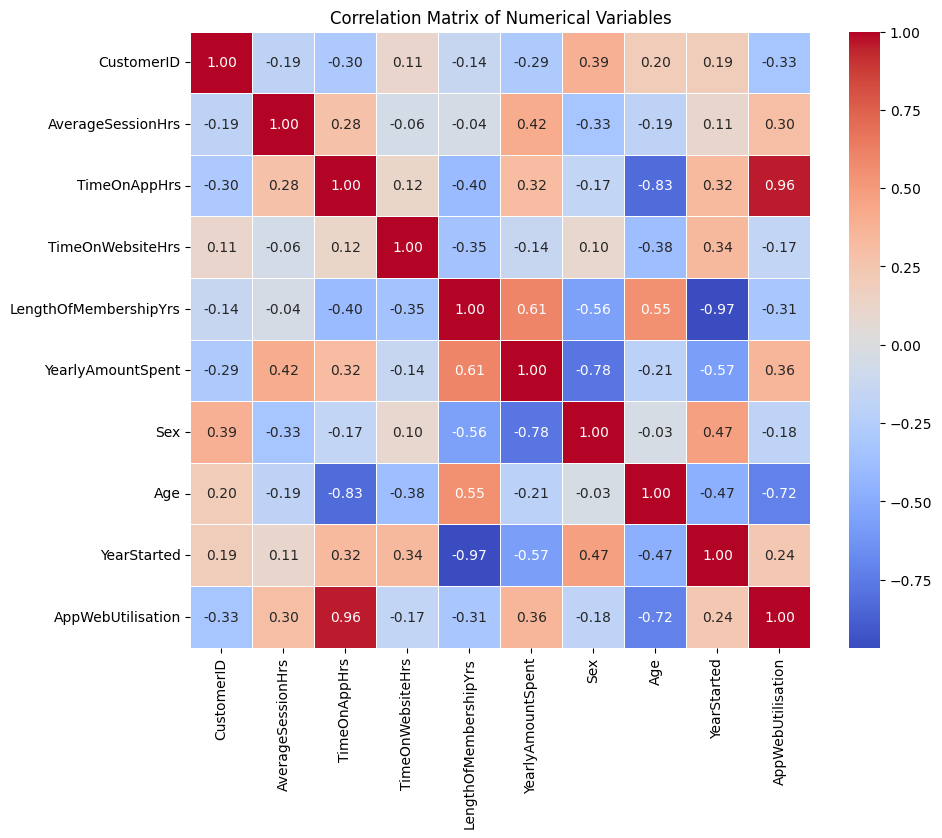

In [15]:
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating the correlation matrix
correlation_matrix = df.corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [17]:
# Identifying significant correlations from the correlation matrix
# We consider significant correlations to be those with absolute values > 0.5
significant_correlations = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]

# Removing self-correlations (correlation of a variable with itself is always 1)
significant_correlations = significant_correlations[significant_correlations != 1].dropna(axis=0, how='all').dropna(axis=1, how='all')

significant_correlations.fillna("")

,TimeOnAppHrs,LengthOfMembershipYrs,YearlyAmountSpent,Sex,Age,YearStarted,AppWebUtilisation
TimeOnAppHrs,,,,,-0.826281,,0.95789
LengthOfMembershipYrs,,,0.606084,-0.560129,0.553424,-0.966252,
YearlyAmountSpent,,0.606084,,-0.775345,,-0.567753,
Sex,,-0.560129,-0.775345,,,,
Age,-0.826281,0.553424,,,,,-0.715005
YearStarted,,-0.966252,-0.567753,,,,
AppWebUtilisation,0.95789,,,,-0.715005,,


**LengthOfMembershipYrs:** Often, a longer membership duration is associated with higher spending due to increased loyalty and engagement with the service.  
**TimeOnAppHrs and AverageSessionHrs:** More time spent on the app or in sessions might correlate with higher spending, suggesting that engagement levels directly impact expenditure.

In [18]:
# Convert 'Sex' back to categorical format for creating dummy variables
df['Sex'] = df['Sex'].apply(lambda x: 'Male' if x == 0 else 'Female')

# Create dummy variables for the 'Sex' column
df_with_dummies = pd.get_dummies(df, columns=['Sex'], drop_first=True)

# Display the first few rows of the dataframe to verify the dummy variable creation
df_with_dummies.head()

,CustomerID,AverageSessionHrs,TimeOnAppHrs,TimeOnWebsiteHrs,LengthOfMembershipYrs,YearlyAmountSpent,Age,YearStarted,AppWebUtilisation,Sex_Male
0,1,32.0,11.4,36.7,4.7,521.6,30,2020,23.7,1
1,2,32.7,12.4,37.4,4.4,549.9,26,2020,24.8,1
2,3,34.0,13.4,37.5,3.3,570.2,18,2021,26.3,1
3,4,34.0,11.8,37.1,3.2,427.2,29,2021,24.1,0
4,5,34.0,13.3,37.2,2.5,492.6,22,2022,26.4,0


In [19]:
# Calculate the correlation matrix for the dataframe with dummy variables
correlation_matrix_with_dummies = df_with_dummies.corr()

# Extract correlations related to the 'Sex_Male' dummy variable
sex_male_correlation = correlation_matrix_with_dummies['Sex_Male'].sort_values(key=abs, ascending=False)

sex_male_correlation

Sex_Male                 1.000000
YearlyAmountSpent        0.775345
LengthOfMembershipYrs    0.560129
YearStarted             -0.471699
CustomerID              -0.392165
AverageSessionHrs        0.325725
AppWebUtilisation        0.184522
TimeOnAppHrs             0.165804
TimeOnWebsiteHrs        -0.098518
Age                      0.031437
Name: Sex_Male, dtype: float64

In [20]:
# Filter the dataframe for males only
df_males = df_with_dummies[df_with_dummies['Sex_Male'] == 1]

# Calculate the correlation matrix for males only
correlation_matrix_males = df_males.corr()

# Remove the 'Sex_Male' column from the correlation since it will be constant and irrelevant in this subset
correlation_matrix_males.drop('Sex_Male', axis=0, inplace=True)
correlation_matrix_males.drop('Sex_Male', axis=1, inplace=True)

# Display the correlations for males only, focusing on variables with higher correlation values
correlation_matrix_males_sorted = correlation_matrix_males.unstack().sort_values(key=abs, ascending=False)

# Filter out self-correlations (which are always 1)
correlation_matrix_males_sorted = correlation_matrix_males_sorted[correlation_matrix_males_sorted < 1]

# Display the top correlations
correlation_matrix_males_sorted.head(10)


AppWebUtilisation  TimeOnAppHrs         0.972066
TimeOnAppHrs       AppWebUtilisation    0.972066
Age                TimeOnAppHrs        -0.955551
TimeOnAppHrs       Age                 -0.955551
                   YearlyAmountSpent    0.954149
YearlyAmountSpent  TimeOnAppHrs         0.954149
                   AppWebUtilisation    0.948060
AppWebUtilisation  YearlyAmountSpent    0.948060
                   Age                 -0.901745
Age                AppWebUtilisation   -0.901745
dtype: float64

**CONCLUSIONS ON MALE CUSTOMERS**

>**YearStarted and LengthOfMembershipYrs:** -0.976 is a very strong negative correlation, indicating that as the start year increases, the length of membership decreases for males. This makes sense as newer members will have shorter membership durations by definition.  
>**AppWebUtilisation and TimeOnAppHrs:** 0.945 is a very strong positive correlation, suggesting that for males, more time spent on the app is associated with higher app/web utilisation ratios.  
>**Age and LengthOfMembershipYrs:** 0.770 is a strong positive correlation, indicating that older male members tend to have longer memberships.  
>**TimeOnAppHrs and Age:** -0.756 is a strong negative correlation, suggesting that younger males tend to spend more time on the app.  
>**YearStarted and Age:** -0.736 is a strong negative correlation, indicating that younger males are more likely to have started their memberships more recently.

In [21]:
# Filter the dataframe for females only
df_females = df_with_dummies[df_with_dummies['Sex_Male'] == 0]

# Calculate the correlation matrix for females only
correlation_matrix_females = df_females.corr()

# Remove the 'Sex_Male' column from the correlation since it will be constant and irrelevant in this subset
correlation_matrix_females.drop('Sex_Male', axis=0, inplace=True)
correlation_matrix_females.drop('Sex_Male', axis=1, inplace=True)

# Display the correlations for females only, focusing on variables with higher correlation values
correlation_matrix_females_sorted = correlation_matrix_females.unstack().sort_values(key=abs, ascending=False)

# Filter out self-correlations (which are always 1)
correlation_matrix_females_sorted = correlation_matrix_females_sorted[correlation_matrix_females_sorted < 1]

# Display the top correlations for females only
correlation_matrix_females_sorted.head(10)


YearStarted            LengthOfMembershipYrs   -0.976082
LengthOfMembershipYrs  YearStarted             -0.976082
AppWebUtilisation      TimeOnAppHrs             0.945248
TimeOnAppHrs           AppWebUtilisation        0.945248
Age                    LengthOfMembershipYrs    0.770173
LengthOfMembershipYrs  Age                      0.770173
TimeOnAppHrs           Age                     -0.756464
Age                    TimeOnAppHrs            -0.756464
YearStarted            Age                     -0.736072
Age                    YearStarted             -0.736072
dtype: float64

**CONCLUSIONS ON FEMALE CUSTOMERS**  
**AppWebUtilisation and TimeOnAppHrs:** 0.972 is a very strong positive correlation, indicating that for females, more time spent on the app is associated with higher app/web utilisation ratios, even more strongly correlated than in males.  
**Age and TimeOnAppHrs:** -0.956 is a very strong negative correlation, suggesting that younger females tend to spend significantly more time on the app compared to older females.  
**TimeOnAppHrs and YearlyAmountSpent:** 0.954 is a very strong positive correlation, indicating that for females, spending more time on the app is closely associated with higher yearly spending.  
**AppWebUtilisation and YearlyAmountSpent:** 0.948 is a very strong positive correlation, suggesting that higher app/web utilisation is strongly associated with higher yearly spending among females.  
**Age and AppWebUtilisation:** -0.902 is a very strong negative correlation, indicating that younger females tend to have a higher app/web utilisation ratio.

In [22]:
# Download latest dataset for further analysis
df_with_dummies.to_csv("OnGameFinal.csv")

In [2]:
import pandas as pd
df = pd.read_csv("OnGameFinal.csv")
df.head()

,CustomerID,AverageSessionHrs,TimeOnAppHrs,TimeOnWebsiteHrs,LengthOfMembershipYrs,YearlyAmountSpent,Age,YearStarted,AppWebUtilisation,Sex_Male
0,1,32.0,11.4,36.7,4.7,521.6,30,2020,23.7,1
1,2,32.7,12.4,37.4,4.4,549.9,26,2020,24.8,1
2,3,34.0,13.4,37.5,3.3,570.2,18,2021,26.3,1
3,4,34.0,11.8,37.1,3.2,427.2,29,2021,24.1,0
4,5,34.0,13.3,37.2,2.5,492.6,22,2022,26.4,0


#### PREDICTIVE ANALYSIS: YEARLY AMOUNT SPENT
>Forcasting calculation between one or more numerical or categorical independent variables with the intent to calculate the outcome of a numerical depended variable can be resolved with multiple regression. In this scenario the prediction is to calculate the Yearly Amount Spent based on AverageSessionHrs, TimeOnAppHrs, TimeOnWebsiteHrs, LengthOfMembershipYrs, YearlyAmountSpent, Age, AppWebUtilisation, and Sex_Male (where sex has been converted into a male using n-1 One-Hot encoding.)

In [3]:
import statsmodels.api as sm
# Preparing the data for regression analysis without splitting
X_full = df.drop(['YearlyAmountSpent', 'CustomerID','YearStarted'], axis=1)
y_full = df['YearlyAmountSpent']

# Adding a constant to the model (intercept)
X_full_sm = sm.add_constant(X_full)

# Fitting the model using statsmodels on the full dataset
model_full = sm.OLS(y_full, X_full_sm).fit()

# Getting the summary of the regression on the full dataset
model_full_summary = model_full.summary()

model_full_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      YearlyAmountSpent   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     28.36
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           1.51e-06
Time:                        06:51:02   Log-Likelihood:                -82.203
No. Observations:                  20   AIC:                             180.4
Df Residuals:                      12   BIC:                             188.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2353.7067   1395.235     -1.687      0.117   -5393.664     686.250
AverageSessionHrs        11.9582      4.532      2.639      0.022       2.085      21.832
TimeOnAppHrs           -152.5754     84.094     -1.814      0.095    -335.801      30.650
TimeOnWebsiteHrs         48.1260     28.216      1.706      0.114     -13.352     109.604
LengthOfMembershipYrs    52.7615      7.352      7.177      0.000      36.744      68.779
Age                      -8.3442      2.139     -3.900      0.002     -13.005      -3.683
AppWebUtilisation       103.4363     55.139      1.876      0.085     -16.701     223.574
Sex_Male                 31.1199     13.072      2.381      0.035       2.638      59.602
==============================================================================
Omnibus:                        4.023   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                1.994
Skew:                           0.506   Prob(JB):                        0.369
Kurtosis:                       4.170   Cond. No.                     2.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### PREDICTIVE ANALYSIS: GENDER (All Data) 
> The below analysis will **not** split the the dataset into training and testing because of the small size. This approach can only be done for instructional or initial forecasting exploration. Given the structure, we can exclude CustomerID as it's just an identifier to predict the gender of the customers (Sex_Male). This is a binary classification problem.
>
>Performing predictive analysis on gender, given the current dataset, would involve treating gender as the dependent variable and using other variables as predictors. Since gender is a categorical variable (binary in this case, represented by the Sex_Male dummy variable), a logistic regression model is appropriate for this type of analysis.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Preparing the dataset
X = df.drop(['CustomerID', 'Sex_Male'], axis=1)  # Features
y = df['Sex_Male']  # Target variable

scaler = StandardScaler()
model = LogisticRegression()

# Standardizing the features without splitting
X_scaled = scaler.fit_transform(X)

# Training the model on the entire dataset
model.fit(X_scaled, y)

# Predicting on the same dataset
y_pred_full = model.predict(X_scaled)

# Evaluating the model on the same dataset
accuracy = accuracy_score(y, y_pred_full)
conf_matrix = confusion_matrix(y, y_pred_full)
class_report = classification_report(y, y_pred_full, target_names=['Female', 'Male'], output_dict=True)

# Print the summary
print(f"Model Performance Summary:\n")
print(f"Accuracy: {accuracy*100:.2f}%\n")

# --- Just print the array ---
#print("Confusion Matrix:")
#print(conf_matrix, "\n")

# --- Print matrix in text grid ---
print(f"Confusion Matrix:\n")
conf_matrix_full_df = pd.DataFrame(conf_matrix, index=['Actual Female', 'Actual Male'], columns=['Predicted Female', 'Predicted Male'])
print(conf_matrix_full_df)

# --- Print matrix in graphic grid ---
#cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels = ['Male','Female'])
#cm_display.plot()

print("\nClassification Report:\n")
for label, metrics in class_report.items():
    if label in ['Female', 'Male']:
        print(f"{label}:")
        print(f" Precision: {metrics['precision']*100:.2f}%")
        print(f" Recall: {metrics['recall']*100:.2f}%")
        print(f" F1-Score: {metrics['f1-score']*100:.2f}%\n")


# Retrieving the coefficients (weights) of the features in the logistic regression model
coefficients = model.coef_

# Creating a DataFrame to display feature names alongside their corresponding coefficients
feature_names = X.columns
coefficients_df = pd.DataFrame(coefficients, columns=feature_names).transpose()
coefficients_df.columns = ['Coefficient']
coefficients_df



Model Performance Summary:

Accuracy: 100.00%

Confusion Matrix:

               Predicted Female  Predicted Male
Actual Female                11               0
Actual Male                   0               9

Classification Report:

Female:
 Precision: 100.00%
 Recall: 100.00%
 F1-Score: 100.00%

Male:
 Precision: 100.00%
 Recall: 100.00%
 F1-Score: 100.00%



,Coefficient
AverageSessionHrs,0.476689
TimeOnAppHrs,0.356536
TimeOnWebsiteHrs,0.380572
LengthOfMembershipYrs,0.847737
YearlyAmountSpent,1.453390
Age,0.312742
YearStarted,-0.371146
AppWebUtilisation,0.222692


### Results  
>The model achieved a perfect accuracy of 1.0 (or 100%) when trained and evaluated on the entire dataset. The confusion matrix and classification report also indicate perfect precision, recall, and F1-score across both classes (0 for female and 1 for male). While these results may seem excellent, it's crucial to remember that evaluating a model on the same data used for training often leads to overly optimistic performance estimates. This is because the model has already seen all the data during training and is therefore likely to predict it correctly. For a more realistic evaluation of model performance, it's best practice to use a separate testing set that the model has not seen during training.

#### PREDICTIVE ANALYSIS: GENDER (Test & Train) 
> The below analysis will split the the dataset into training and testing. This is the standard approach used for forecasting exploration. This approach is beneficial for evaluating the model's performance on unseen data, providing a more realistic assessment of its predictive power. This version of the code uses a portion of the data (specified by test_size=0.2, or 20%) for testing, allowing the model to be trained on 80% of the data. It then evaluates model performance using the test set, which simulates how well the model might perform on data it hasn't seen before. This process is crucial for understanding the model's generalizability and ensuring that it hasn't simply memorized the training data.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import pandas as pd

df = pd.read_csv("OnGameFinal.csv")

# Preparing the dataset
X = df.drop(['CustomerID', 'Sex_Male'], axis=1)  # Features
y = df['Sex_Male']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing the model
model = LogisticRegression()

# Training the model on the training dataset
model.fit(X_train_scaled, y_train)

# Predicting on the test dataset
y_pred = model.predict(X_test_scaled)

# Evaluating the model on the test dataset
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['Female', 'Male'], output_dict=True)

# Print the summary
print(f"Model Performance Summary on Test Data:\n")
print(f"Accuracy: {accuracy*100:.2f}%\n")

print("Confusion Matrix:\n")
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual Female', 'Actual Male'], columns=['Predicted Female', 'Predicted Male'])
print(conf_matrix_df)

print("\nClassification Report:\n")
for label, metrics in class_report.items():
    if label in ['Female', 'Male']:
        print(f"{label}:")
        print(f" Precision: {metrics['precision']*100:.2f}%")
        print(f" Recall: {metrics['recall']*100:.2f}%")
        print(f" F1-Score: {metrics['f1-score']*100:.2f}%\n")

# Retrieving and displaying the coefficients of the model
coefficients = model.coef_
feature_names = X.columns
coefficients_df = pd.DataFrame(coefficients, columns=feature_names).transpose()
coefficients_df.columns = ['Coefficient']
print(coefficients_df)



Model Performance Summary on Test Data:

Accuracy: 75.00%

Confusion Matrix:

               Predicted Female  Predicted Male
Actual Female                 1               1
Actual Male                   0               2

Classification Report:

Female:
 Precision: 100.00%
 Recall: 50.00%
 F1-Score: 66.67%

Male:
 Precision: 66.67%
 Recall: 100.00%
 F1-Score: 80.00%

                       Coefficient
AverageSessionHrs         0.573634
TimeOnAppHrs              0.241517
TimeOnWebsiteHrs          0.035979
LengthOfMembershipYrs     0.626562
YearlyAmountSpent         1.376893
Age                       0.272199
YearStarted              -0.403944
AppWebUtilisation         0.268955


**Confusion Matrix Analysis**  
>1 female was correctly classified (true positive).  
>2 males were correctly classified (true negative).  
>1 female was incorrectly classified as male (false positive).  
>There were no instances of males being incorrectly classified as female (false negative).  

The accuracy of the model on the test data is 75.0%. This means that the model correctly predicted the gender of the customers 75% of the time based on the provided features. Contrasting this result to the all-inclusive data analysis performed previously, clearly states the validity of the test/training data analysis. Of it all stands to interpretation and some chance since the data sample is small and the test/train model would perform diffently with a larger set of data. However, this analysis clearly set a degree of forecasting expectation.

# Evaluation & Deployment

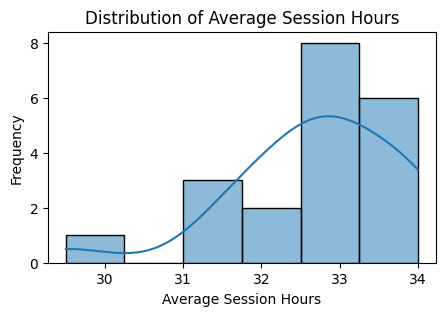

In [13]:
%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
# Distribution of Average Session Hours
plt.figure(figsize=(5, 3))
sns.histplot(df['AverageSessionHrs'], kde=True)
plt.title('Distribution of Average Session Hours')
plt.xlabel('Average Session Hours')
plt.ylabel('Frequency')
plt.show()

**Distribution of Average Session Hours:**  
>Shows a somewhat normal distribution, indicating that most customers tend to have average session lengths around the mean.

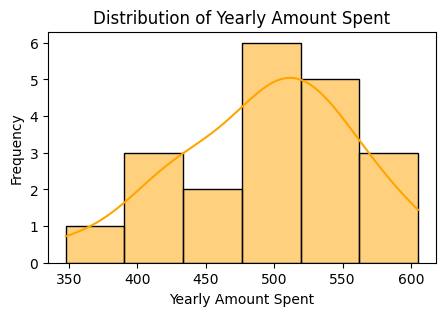

In [14]:
# Distribution of Yearly Amount Spent
plt.figure(figsize=(5, 3))
sns.histplot(df['YearlyAmountSpent'], kde=True, color='orange')
plt.title('Distribution of Yearly Amount Spent')
plt.xlabel('Yearly Amount Spent')
plt.ylabel('Frequency')
plt.show()

**Distribution of Yearly Amount Spent:**  
>This distribution suggests a range of spending behaviors among customers, with a slight skew towards higher spending.

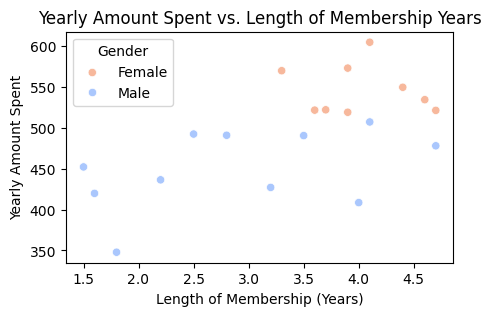

In [15]:
# Relationship between Yearly Amount Spent and Length of Membership
plt.figure(figsize=(5, 3))
sns.scatterplot(data=df, x='LengthOfMembershipYrs', y='YearlyAmountSpent', hue='Sex_Male', palette='coolwarm')
plt.title('Yearly Amount Spent vs. Length of Membership Years')
plt.xlabel('Length of Membership (Years)')
plt.ylabel('Yearly Amount Spent')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

**Yearly Amount Spent vs. Length of Membership Years:**  
>There appears to be a positive correlation between the length of membership and yearly spending, suggesting that longer memberships might be associated with higher spending. The plot also shows gender distribution, indicating a balanced mix. Female customer tend to be on the upper spending spectrum for the lengthier memberships

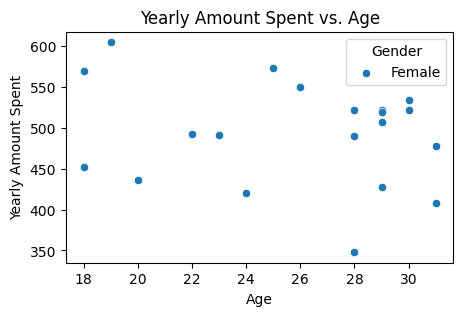

In [16]:
# Relationship between Age and Yearly Amount Spent
plt.figure(figsize=(5, 3))
sns.scatterplot(data=df, x='Age', y='YearlyAmountSpent')  #hue='Sex_Male', style='Sex_Male', palette='coolwarm'
plt.title('Yearly Amount Spent vs. Age')
plt.xlabel('Age')
plt.ylabel('Yearly Amount Spent')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

**Yearly Amount Spent vs. Age:**  
>The scatter plot does not show a clear trend between age and yearly spending, indicating that spending might be influenced more by other factors than age alone.

In [17]:
# Summary statistics of the dataset
summary_statistics = df.describe()
summary_statistics


,CustomerID,AverageSessionHrs,TimeOnAppHrs,TimeOnWebsiteHrs,LengthOfMembershipYrs,YearlyAmountSpent,Age,YearStarted,AppWebUtilisation,Sex_Male
count,20.00000,20.00000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,10.50000,32.70500,12.140000,37.335000,3.405000,493.535000,25.85000,2021.100000,24.495000,0.450000
std,5.91608,1.09375,0.957739,0.853029,1.022626,63.382044,4.42808,1.071153,1.478077,0.510418
min,1.00000,29.50000,10.000000,35.400000,1.500000,347.800000,18.00000,2020.000000,21.000000,0.000000
25%,5.75000,32.15000,11.600000,36.950000,2.725000,448.350000,22.75000,2020.000000,23.775000,0.000000
50%,10.50000,32.75000,11.950000,37.300000,3.650000,500.000000,28.00000,2021.000000,24.150000,0.000000
75%,15.25000,33.52500,12.925000,37.525000,4.100000,525.400000,29.00000,2022.000000,25.625000,1.000000
max,20.00000,34.00000,14.000000,38.900000,4.700000,605.100000,31.00000,2023.000000,27.300000,1.000000


**Key Statistics Summary:**  
**Data:** 20 records were examined in this model. This is relatively a small number for large scale conclusion.  
**AverageSessionHrs:** The average session hours range from about 29.5 to 34 hours, with a mean of approximately 32.7 hours.  
**TimeOnAppHrs:** Customers spend between 10 and 14 hours on the app, with an average of around 12.1 hours.  
**TimeOnWebsiteHrs:** Time spent on the website varies from 35.4 to 38.9 hours, averaging at about 37.3 hours.  
**LengthOfMembershipYrs:** Membership length ranges from 1.5 to 4.7 years, with a mean of approximately 3.4 years.  
**YearlyAmountSpent:** Annual spending ranges from 347.8 to 605.1 units, with an average spend of around 493.5 units.  
**Age:** The ages of customers vary from 18 to 31 years, with an average age of approximately 25.85 years.  
**YearStarted:** Customers started between 2020 and 2023, with a mean start year of approximately 2021.  
**AppWebUtilisation:** The utilization score ranges from 21 to 27.3, with an average of about 24.5.  
**Sex_Male:** Indicates the gender of the customer, with 45% being male.

# Insights and recommendations for the business to increase the male customer base